<a href="https://colab.research.google.com/github/HackerJacky/Crypto-quantitative-analysis/blob/main/crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 pip install pyfolio-reloaded

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 33.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 90.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.3-py3-none-any.whl size=138487 sha256=e93bc919af612ec9945e03d9d91878ccdc65d9d8109376b09b42428a027bfa3c
  Stored in directory: /root/.cache/pip/wheels/39/c7/dd/909d267742f7fbb941ff081dacd661f622a0b4eb38f667b84b
Successfully built peewee
  Attempting uninstall: peewee
    Found existing installation: peewee 3.18.3
    Uninstalling peewee-3.18.3:
      Successfully uninstalled peewee-3.18.3


In [2]:
pip install alphalens-reloaded

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.6 MB/s eta 0:00:00


In [3]:
pip install "git+https://github.com/tidy-finance/py-fmpapi"

  Cloning https://github.com/tidy-finance/py-fmpapi to /tmp/pip-req-build-ke6i8mp7
  Running command git clone --filter=blob:none --quiet https://github.com/tidy-finance/py-fmpapi /tmp/pip-req-build-ke6i8mp7
  Resolved https://github.com/tidy-finance/py-fmpapi to commit 353fd1a134d34a021a403e1d4ce283c3046bde8a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for fmpapi: filename=fmpapi-1.0.0-py3-none-any.whl size=8219 sha256=d6e011d86091fa47ae5410c7e5579f71a0f48dd41a95bf406d7a110edfd8cc63
  Stored in directory: /tmp/pip-ephem-wheel-cache-i4t85ve6/wheels/bc/c0/57/a68aa930336442d4b81e59a225a0d498e525711988ed2092a7
Successfully built fmpapi


In [4]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 28.5 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.stattools import adfuller
import os
from matplotlib.font_manager import FontProperties
warnings.filterwarnings('ignore')

#載入資料

In [6]:
start='2020-01-01'
end='2025-11-20'
#Bitcoin closed price
BTC = yf.download('BTC-USD', start=start, end=end)['Close'].ffill().dropna()
#Micorstrategy closed price
Micro = yf.download('MSTR', start=start, end=end)['Close'].ffill().dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


#針對Microstrategy和Bitcoin做股價疊圖


In [7]:
from matplotlib.font_manager import FontManager
import subprocess

mpl_fonts = set(f.name for f in FontManager().ttflist)

print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)

all font list get from matplotlib.font_manager:
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu Serif
	DejaVu Serif Display
	Humor Sans
	Liberation Mono
	Liberation Sans
	Liberation Sans Narrow
	Liberation Serif
	STIXGeneral
	STIXNonUnicode
	STIXSizeFiveSym
	STIXSizeFourSym
	STIXSizeOneSym
	STIXSizeThreeSym
	STIXSizeTwoSym
	cmb10
	cmex10
	cmmi10
	cmr10
	cmss10
	cmsy10
	cmtt10


In [8]:
import matplotlib.font_manager as fm
for f in fm.findSystemFonts():
    if "Noto Sans CJK JP" in f:
        print(f)

In [9]:
!wget -q -O NotoSansTC-Regular.otf https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTF/TraditionalChinese/NotoSansTC-Regular.otf

In [10]:
!sudo apt-get update -y
!sudo apt-get install -y fonts-noto-cjk

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,153 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Pa

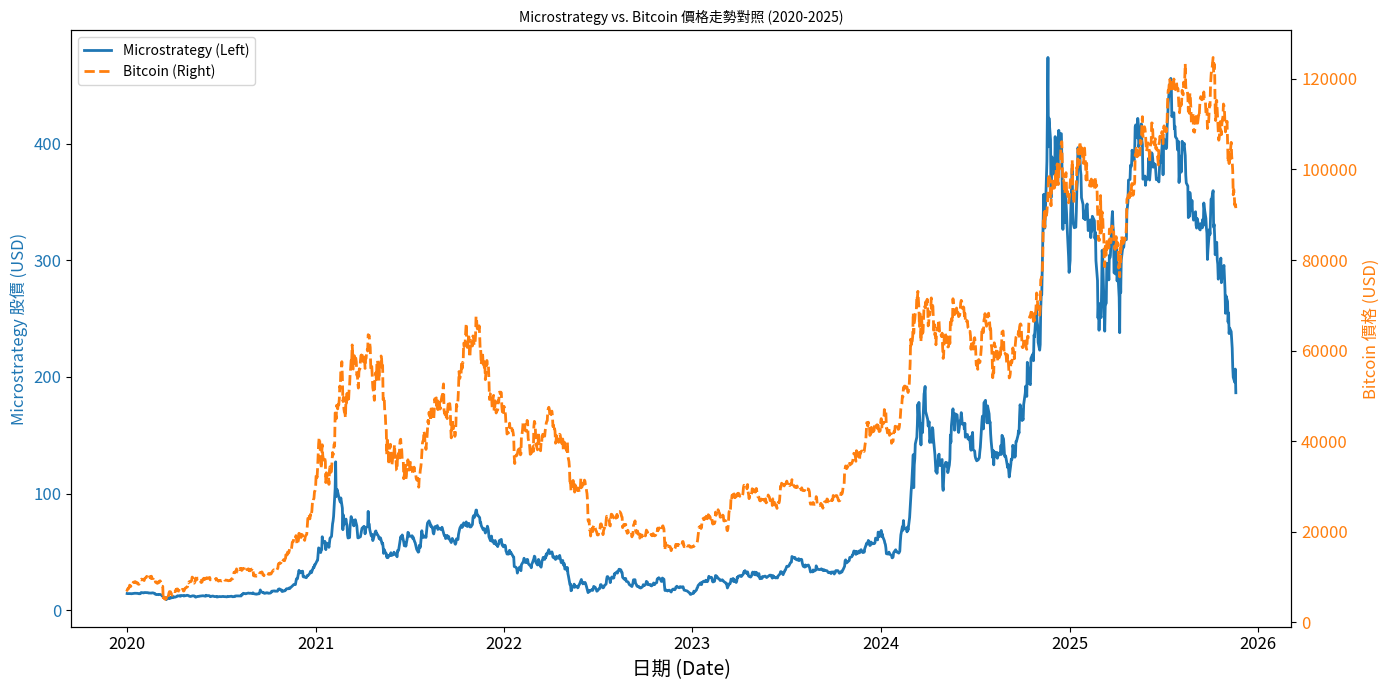

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from google.colab import files

# ----------------------------------------------------
# 1. 字型設定（Colab 版）
# ----------------------------------------------------
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
myfont = FontProperties(fname=font_path)
plt.rcParams['axes.unicode_minus'] = False

# ----------------------------------------------------
# 2. 畫圖
# ----------------------------------------------------
fig, ax1 = plt.subplots(figsize=(14, 7))

# 左軸：MSTR
color_mstr = 'tab:blue'
ax1.set_xlabel('日期 (Date)', fontproperties=myfont, fontsize=14)
ax1.set_ylabel('Microstrategy 股價 (USD)',
               color=color_mstr, fontproperties=myfont, fontsize=12)

line1 = ax1.plot(Micro.index, Micro['MSTR'], color=color_mstr,
                 label='Microstrategy (Left)', linewidth=2)

ax1.tick_params(axis='y', labelcolor=color_mstr)

# 右軸：BTC
ax2 = ax1.twinx()
color_btc = 'tab:orange'
ax2.set_ylabel('Bitcoin 價格 (USD)',
               color=color_btc, fontsize=12, fontproperties=myfont)

line2 = ax2.plot(BTC.index, BTC['BTC-USD'], color=color_btc,
                 label='Bitcoin (Right)', linewidth=2, linestyle='--')

ax2.tick_params(axis='y', labelcolor=color_btc)

# ----------------------------------------------------
# 3. 套用字體到所有刻度 tick labels
# ----------------------------------------------------
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontproperties(myfont)
    label.set_fontsize(12)

for label in ax2.get_yticklabels():
    label.set_fontproperties(myfont)
    label.set_fontsize(12)

# ----------------------------------------------------
# 4. 圖例 legend 套用中文字體
# ----------------------------------------------------
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left',
           fontsize=12, prop=myfont)

# ----------------------------------------------------
# 5. 標題
# ----------------------------------------------------
plt.title('Microstrategy vs. Bitcoin 價格走勢對照 (2020-2025)',
          fontsize=28, fontweight='bold', fontproperties=myfont)

fig.tight_layout()

# ----------------------------------------------------
# 6. 匯出 + 下載（Colab 專用）
# ----------------------------------------------------
filename = "price_trend_comparison.png"
plt.savefig(filename, dpi=300)
plt.show()

files.download(filename)


#做定態檢定


In [12]:
try:
    from arch.unitroot import PhillipsPerron
    HAS_ARCH = True
except ImportError:
    HAS_ARCH = False
    print("警告: 未安裝 'arch' 套件，將跳過 PP 檢定。建議執行: pip install arch")

# 1. 下載資料
def get_data():
    print("正在下載資料...")
    tickers = ['MSTR', 'BTC-USD']
    data = yf.download(tickers, start='2020-01-01', end='2024-11-25')['Close']
    data = data.ffill().dropna()
    return data

# 2. ADF 檢定函數
def run_adf_test(series, name):
    result = adfuller(series)
    print(f"  [ADF] {name} - Stat: {result[0]:.4f}, P-value: {result[1]:.4f}")
    return result[0], result[1]

# 3. PP 檢定函數
def run_pp_test(series, name):
    if not HAS_ARCH:
        return np.nan, np.nan

    # PhillipsPerron 默認使用 'c' (constant, 含截距項)，這符合一般金融價格檢定
    pp = PhillipsPerron(series)
    print(f"  [PP ] {name} - Stat: {pp.stat:.4f}, P-value: {pp.pvalue:.4f}")
    return pp.stat, pp.pvalue

# 主程式
if __name__ == "__main__":
    df = get_data()

    # 計算對數報酬率
    df_log_ret = np.log(df / df.shift(1)).dropna()

    print("\n=== 開始進行定態檢定 (Stationarity Tests) ===")
    print("說明：若 P-value < 0.05，代表資料平穩 (Stationary)，拒絕虛無假設。\n")

    results = []

    # 定義要檢定的項目
    targets = [
        ('MSTR (Level)', df['MSTR']),
        ('MSTR (Return)', df_log_ret['MSTR']),
        ('BTC (Level)', df['BTC-USD']),
        ('BTC (Return)', df_log_ret['BTC-USD'])
    ]

    for label, series in targets:
        print(f"--- 分析: {label} ---")
        adf_stat, adf_p = run_adf_test(series, label)
        pp_stat, pp_p = run_pp_test(series, label)

        # 儲存結果以便查看 (可以用來填入 LaTeX)
        results.append({
            'Variable': label,
            'ADF Stat': adf_stat,
            'ADF P-val': adf_p,
            'PP Stat': pp_stat,
            'PP P-val': pp_p
        })

    print("\n=== 彙整結果表格 (可填入論文) ===")
    print(f"{'變數':<20} | {'ADF Stat':<10} | {'ADF P-val':<10} | {'PP Stat':<10} | {'PP P-val':<10}")
    print("-" * 70)
    for r in results:
        # 判斷星號
        adf_star = "***" if r['ADF P-val'] < 0.01 else "**" if r['ADF P-val'] < 0.05 else "*" if r['ADF P-val'] < 0.1 else ""
        pp_star = "***" if r['PP P-val'] < 0.01 else "**" if r['PP P-val'] < 0.05 else "*" if r['PP P-val'] < 0.1 else "" if not np.isnan(r['PP P-val']) else ""

        pp_stat_str = f"{r['PP Stat']:.4f}" if not np.isnan(r['PP Stat']) else "N/A"

        print(f"{r['Variable']:<20} | {r['ADF Stat']:.4f}{adf_star:<3} | {r['ADF P-val']:.4f}     | {pp_stat_str}{pp_star:<3} | {r['PP P-val']:.4f}")

    print("\n註: *** p<0.01, ** p<0.05, * p<0.1")

[*********************100%***********************]  2 of 2 completed

正在下載資料...

=== 開始進行定態檢定 (Stationarity Tests) ===
說明：若 P-value < 0.05，代表資料平穩 (Stationary)，拒絕虛無假設。

--- 分析: MSTR (Level) ---


  [ADF] MSTR (Level) - Stat: 2.8877, P-value: 1.0000
  [PP ] MSTR (Level) - Stat: 4.1583, P-value: 1.0000
--- 分析: MSTR (Return) ---
  [ADF] MSTR (Return) - Stat: -43.1977, P-value: 0.0000
  [PP ] MSTR (Return) - Stat: -43.2909, P-value: 0.0000
--- 分析: BTC (Level) ---
  [ADF] BTC (Level) - Stat: -0.2145, P-value: 0.9368
  [PP ] BTC (Level) - Stat: -0.0568, P-value: 0.9536
--- 分析: BTC (Return) ---
  [ADF] BTC (Return) - Stat: -13.7663, P-value: 0.0000
  [PP ] BTC (Return) - Stat: -44.6413, P-value: 0.0000

=== 彙整結果表格 (可填入論文) ===
變數                   | ADF Stat   | ADF P-val  | PP Stat    | PP P-val  
----------------------------------------------------------------------
MSTR (Level)         | 2.8877    | 1.0000     | 4.1583    | 1.0000
MSTR (Return)        | -43.1977*** | 0.0000     | -43.2909*** | 0.0000
BTC (Level)          | -0.2145    | 0.9368     | -0.0568    | 0.9536
BTC (Return)         | -13.7663*** | 0.0000     | -44.6413*** | 0.0000

註: *** p<0.01, ** p<0.05, * p<0.1


#相關性檢定

In [13]:
correlation = round(BTC['BTC-USD'].corr(Micro['MSTR']),2)


print(f"相關係數: {correlation}")

相關係數: 0.94


資料準備完成，樣本數: 1160
--------------------------------------------------
=== 檢定 A: BTC 是否領先 MSTR? (BTC -> MSTR) ===
Lag 3: P-value = 0.0430 (顯著! BTC 領先 MSTR)

=== 檢定 B: MSTR 是否領先 BTC? (MSTR -> BTC) ===
未發現顯著因果關係。
--------------------------------------------------
=== Engle-Granger 共整合檢定結果 ===
t-statistic: -2.6044
P-value: 0.2350
結論: P > 0.05，無法拒絕虛無假設 -> 不存在共整合關係 (兩者長期脫鉤)。
--------------------------------------------------


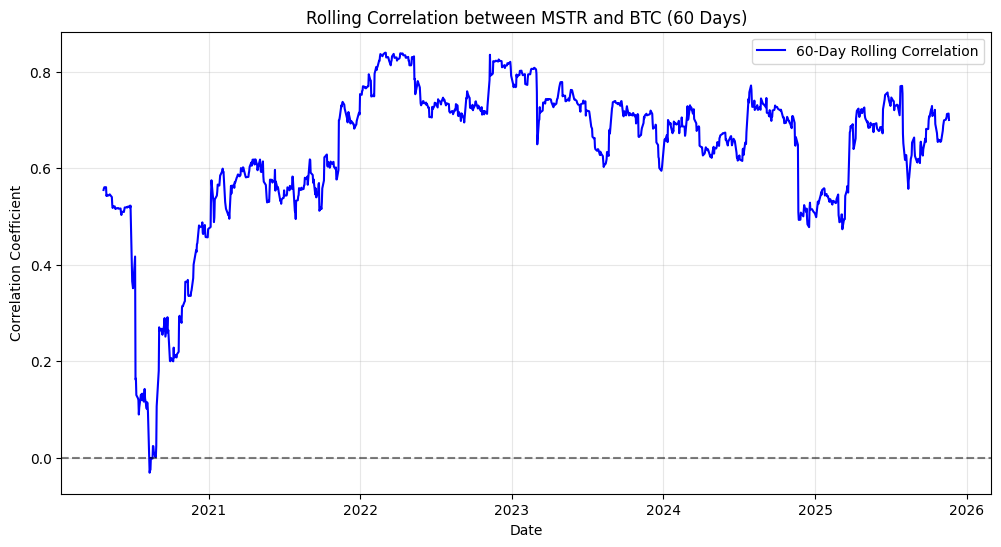

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests, coint
import seaborn as sns

# ==========================================
# 0. 資料準備 (Data Preparation)
# ==========================================
# 假設您的 dataframe 叫 df，且已經有 'BTC' 和 'MSTR' 的價格
# 如果還沒有計算 Return，這裡幫您算好 (使用對數報酬率 log return 較佳，或一般百分比變化亦可)
df = pd.concat([BTC, Micro], axis=1)

# 2. 重新命名欄位 (因為原本兩個都叫 'Close'，會混淆)
df.columns = ['BTC', 'MSTR']
df['BTC_Ret'] = np.log(df['BTC'] / df['BTC'].shift(1))
df['MSTR_Ret'] = np.log(df['MSTR'] / df['MSTR'].shift(1))

# 移除空值 (第一筆資料會是 NaN)
data = df.dropna()

print("資料準備完成，樣本數:", len(data))
print("-" * 50)

# ==========================================
# 1. Granger 因果檢定 (Granger Causality)
# ==========================================
# 注意：必須使用「平穩」的資料 (Return)
# 檢定 H0: 第二個變數 "不能" 預測第一個變數

max_lags = 5  # 您可以設定要往前看幾天 (例如 5 天)

print(f"=== 檢定 A: BTC 是否領先 MSTR? (BTC -> MSTR) ===")
# 格式: dataframe[[被預測變數, 預測變數]]
gc_res_1 = grangercausalitytests(data[['MSTR_Ret', 'BTC_Ret']], maxlag=max_lags, verbose=False)

# 只印出 P-value 小於 0.05 的落後期數 (Lags)
found_causality = False
for lag in range(1, max_lags + 1):
    p_value = gc_res_1[lag][0]['ssr_chi2test'][1]
    if p_value < 0.05:
        print(f"Lag {lag}: P-value = {p_value:.4f} (顯著! BTC 領先 MSTR)")
        found_causality = True
if not found_causality:
    print("未發現顯著因果關係。")

print("\n" + f"=== 檢定 B: MSTR 是否領先 BTC? (MSTR -> BTC) ===")
gc_res_2 = grangercausalitytests(data[['BTC_Ret', 'MSTR_Ret']], maxlag=max_lags, verbose=False)

found_causality = False
for lag in range(1, max_lags + 1):
    p_value = gc_res_2[lag][0]['ssr_chi2test'][1]
    if p_value < 0.05:
        print(f"Lag {lag}: P-value = {p_value:.4f} (顯著! MSTR 領先 BTC)")
        found_causality = True
if not found_causality:
    print("未發現顯著因果關係。")

print("-" * 50)

# ==========================================
# 2. 共整合檢定 (Cointegration Test - Engle-Granger)
# ==========================================
# 注意：必須使用「非平穩」的資料 (Level / Log Price)
# H0: 兩者之間 "不存在" 共整合關係 (無長期關係)

# 使用對數價格通常較好 (Log Price)
score, pvalue, _ = coint(np.log(data['MSTR']), np.log(data['BTC']))

print(f"=== Engle-Granger 共整合檢定結果 ===")
print(f"t-statistic: {score:.4f}")
print(f"P-value: {pvalue:.4f}")

if pvalue < 0.05:
    print("結論: P < 0.05，拒絕虛無假設 -> 存在共整合關係 (兩者長期連動)。")
else:
    print("結論: P > 0.05，無法拒絕虛無假設 -> 不存在共整合關係 (兩者長期脫鉤)。")

print("-" * 50)

# ==========================================
# 3. 滾動相關係數視覺化 (Rolling Correlation)
# ==========================================
# 使用 60 天 (約一季) 的窗口來觀察相關性變化

window_size = 60
rolling_corr = data['MSTR_Ret'].rolling(window=window_size).corr(data['BTC_Ret'])

plt.figure(figsize=(12, 6))
plt.plot(rolling_corr, label=f'{window_size}-Day Rolling Correlation', color='blue')
plt.axhline(0, color='black', linestyle='--', alpha=0.5)  # 0 軸線
plt.title(f'Rolling Correlation between MSTR and BTC ({window_size} Days)')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

filename = "Rolling Correlation between MSTR and BTC.png"
plt.savefig(filename, dpi=300)

files.download(filename)

資料準備完成，樣本數: 1160
------------------------------------------------------------

=== 檢定: BTC 是否領先 MSTR? (BTC -> MSTR) ===
Lag (滯後天數)      | P-value    | 結果判定
---------------------------------------------
Lag 1              | 0.2040     |   不顯著
Lag 2              | 0.3353     |   不顯著
Lag 3              | 0.0430     | ★ 顯著 (Significant)
Lag 4              | 0.0787     |   不顯著
Lag 5              | 0.0963     |   不顯著

=== 檢定: MSTR 是否領先 BTC? (MSTR -> BTC) ===
Lag (滯後天數)      | P-value    | 結果判定
---------------------------------------------
Lag 1              | 0.9105     |   不顯著
Lag 2              | 0.9357     |   不顯著
Lag 3              | 0.4477     |   不顯著
Lag 4              | 0.0808     |   不顯著
Lag 5              | 0.0914     |   不顯著
------------------------------------------------------------

=== Engle-Granger 共整合檢定結果 ===
t-statistic: -2.6044
P-value:     0.2350
結論: P > 0.05，無法拒絕虛無假設 -> 不存在共整合關係 (兩者長期脫鉤)。
------------------------------------------------------------


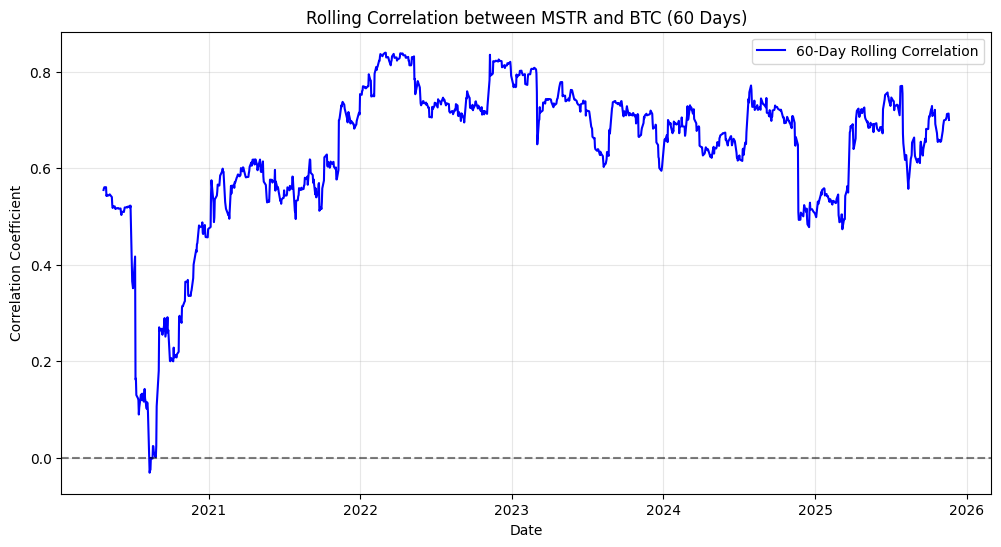

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests, coint
import seaborn as sns
# 如果是在 Google Colab 執行，需要這行來下載圖片
from google.colab import files

# ==========================================
# 0. 資料準備 (Data Preparation)
# ==========================================
# 假設 BTC 和 Micro 這兩個變數已經存在於您的環境中
df = pd.concat([BTC, Micro], axis=1)

# 2. 重新命名欄位
df.columns = ['BTC', 'MSTR']
df['BTC_Ret'] = np.log(df['BTC'] / df['BTC'].shift(1))
df['MSTR_Ret'] = np.log(df['MSTR'] / df['MSTR'].shift(1))

# 移除空值
data = df.dropna()

print("資料準備完成，樣本數:", len(data))
print("-" * 60)

# ==========================================
# 1. Granger 因果檢定 (Granger Causality) - 顯示所有結果
# ==========================================
max_lags = 5  # 設定要往前看幾天

# --- 定義一個小函式來印出漂亮的結果 ---
def print_granger_results(results, direction_text):
    print(f"\n=== 檢定: {direction_text} ===")
    print(f"{'Lag (滯後天數)':<15} | {'P-value':<10} | {'結果判定'}")
    print("-" * 45)

    for lag in range(1, max_lags + 1):
        # 取得 Chi-squared test 的 p-value (通常樣本大時看這個)
        p_value = results[lag][0]['ssr_chi2test'][1]

        # 判斷是否顯著
        if p_value < 0.05:
            status = "★ 顯著 (Significant)"
        else:
            status = "  不顯著"

        print(f"Lag {lag:<14} | {p_value:.4f}     | {status}")

# 執行檢定 A: BTC -> MSTR
gc_res_1 = grangercausalitytests(data[['MSTR_Ret', 'BTC_Ret']], maxlag=max_lags, verbose=False)
print_granger_results(gc_res_1, "BTC 是否領先 MSTR? (BTC -> MSTR)")

# 執行檢定 B: MSTR -> BTC
gc_res_2 = grangercausalitytests(data[['BTC_Ret', 'MSTR_Ret']], maxlag=max_lags, verbose=False)
print_granger_results(gc_res_2, "MSTR 是否領先 BTC? (MSTR -> BTC)")

print("-" * 60)

# ==========================================
# 2. 共整合檢定 (Cointegration Test)
# ==========================================
score, pvalue, _ = coint(np.log(data['MSTR']), np.log(data['BTC']))

print(f"\n=== Engle-Granger 共整合檢定結果 ===")
print(f"t-statistic: {score:.4f}")
print(f"P-value:     {pvalue:.4f}")

if pvalue < 0.05:
    print("結論: P < 0.05，拒絕虛無假設 -> ★ 存在共整合關係 (兩者長期連動)。")
else:
    print("結論: P > 0.05，無法拒絕虛無假設 -> 不存在共整合關係 (兩者長期脫鉤)。")

print("-" * 60)

# ==========================================
# 3. 滾動相關係數視覺化 (Rolling Correlation)
# ==========================================
window_size = 60
rolling_corr = data['MSTR_Ret'].rolling(window=window_size).corr(data['BTC_Ret'])

plt.figure(figsize=(12, 6))
plt.plot(rolling_corr, label=f'{window_size}-Day Rolling Correlation', color='blue', linewidth=1.5)
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.title(f'Rolling Correlation between MSTR and BTC ({window_size} Days)')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)

# 儲存與下載圖片
filename = "Rolling_Correlation_MSTR_BTC.png"
plt.savefig(filename, dpi=300)
plt.show()

# 如果是在 Colab，這行會觸發下載
try:
    files.download(filename)
except:
    pass # 如果不是在 Colab 執行就不下載

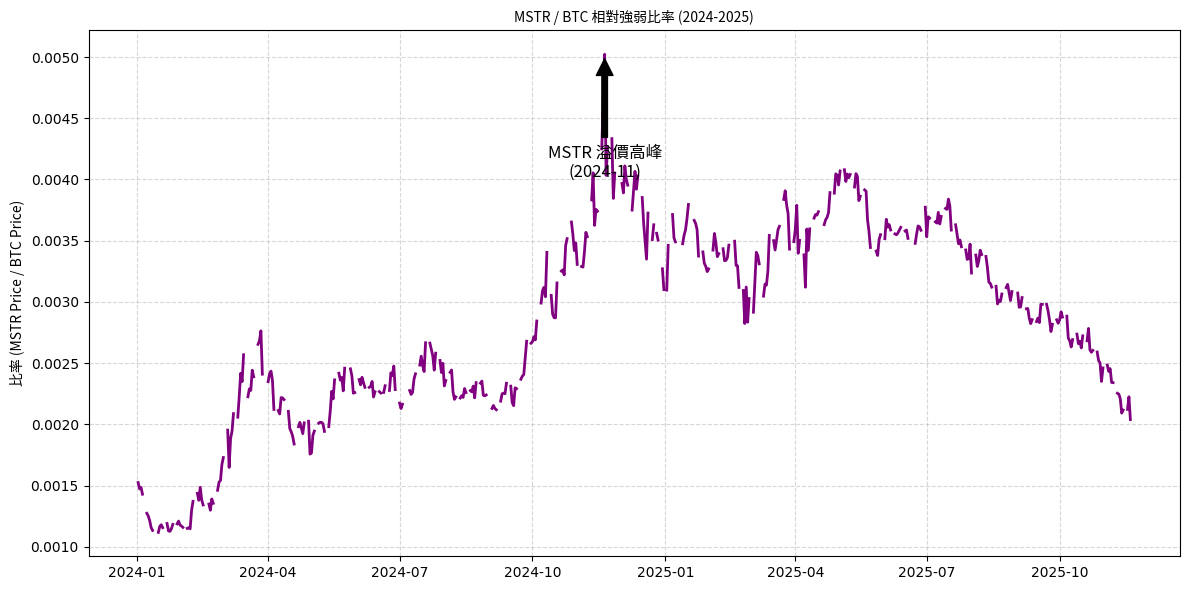

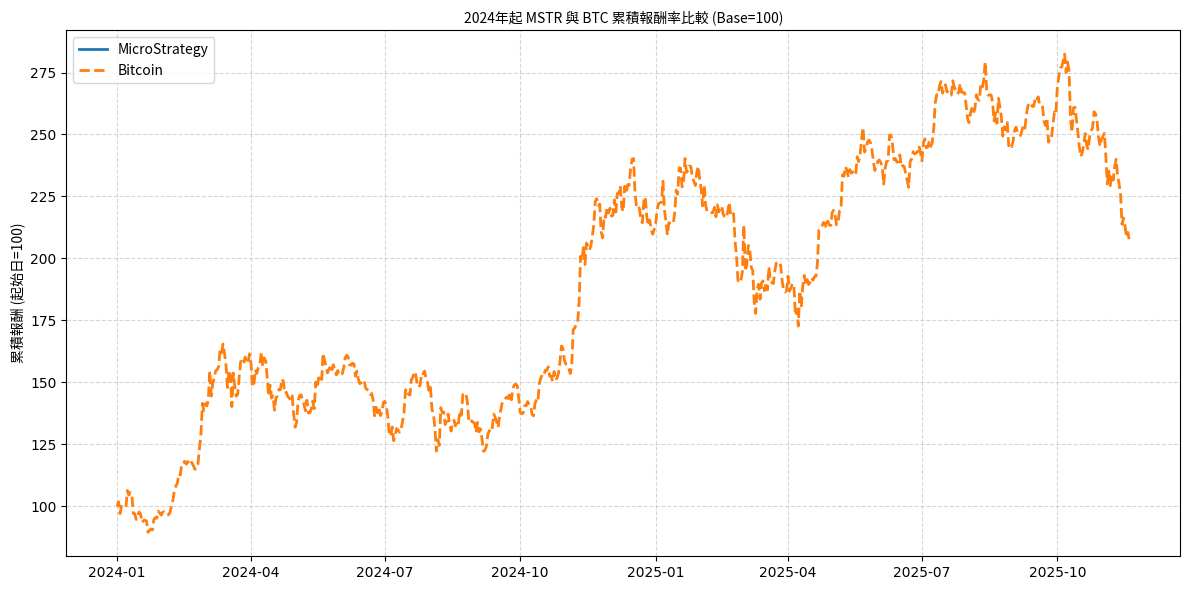

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# 假設 df 是你已經合併好、且去除 NA 的資料框 (包含 'Bitcoin' 和 'MicroStrategy' 兩欄)
# 先聚焦在 2024 年之後的資料
df_2024 = df.loc['2024-01-01':]

# ----------------------------------------------------
# 圖表 1: MSTR/BTC 比率 (MSTR 相對於 BTC 的強弱)
# ----------------------------------------------------
# 這裡計算 MSTR 股價除以 Bitcoin 價格。
# 數值本身意義不大，重點是「趨勢方向」。
ratio = df_2024['MSTR'] / df_2024['BTC']

plt.figure(figsize=(12, 6))
plt.plot(ratio.index, ratio, color='purple', linewidth=2)
plt.title('MSTR / BTC 相對強弱比率 (2024-2025)', fontsize=16, fontproperties=myfont)
plt.ylabel('比率 (MSTR Price / BTC Price)', fontproperties=myfont)
plt.grid(True, linestyle='--', alpha=0.5)

# 標示出 2024 年底的高峰
# 找出這段期間比率最高的那一天
max_date = ratio.idxmax()
max_val = ratio.max()
plt.annotate(f'MSTR 溢價高峰\n({max_date.strftime("%Y-%m")})',
             xy=(max_date, max_val),
             xytext=(max_date, max_val*0.8),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontproperties=myfont, fontsize=12, ha='center')

plt.tight_layout()
plt.show()

# ----------------------------------------------------
# 圖表 2: 標準化走勢 (Rebased to 100) - 最直觀的比較
# ----------------------------------------------------
# 將 2024-01-01 的價格當作 100%
normalized_df = df_2024 / df_2024.iloc[0] * 100

plt.figure(figsize=(12, 6))
plt.plot(normalized_df.index, normalized_df['MSTR'], label='MicroStrategy', color='tab:blue', linewidth=2)
plt.plot(normalized_df.index, normalized_df['BTC'], label='Bitcoin', color='tab:orange', linewidth=2, linestyle='--')

plt.title('2024年起 MSTR 與 BTC 累積報酬率比較 (Base=100)', fontsize=16, fontproperties=myfont)
plt.ylabel('累積報酬 (起始日=100)', fontproperties=myfont)
plt.legend(prop=myfont, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [17]:
print(df_2024.head())

                     BTC       MSTR   BTC_Ret  MSTR_Ret
Date                                                   
2024-01-01  44167.332031        NaN  0.044022       NaN
2024-01-02  44957.968750  68.514999  0.017743       NaN
2024-01-03  42848.175781  63.105999 -0.048065 -0.082237
2024-01-04  44179.921875  65.581001  0.030607  0.038470
2024-01-05  44162.691406  63.108002 -0.000390 -0.038438


--- 檢查 2024 年後的資料前 5 筆 ---
                     BTC       MSTR   BTC_Ret  MSTR_Ret
Date                                                   
2024-01-01  44167.332031        NaN  0.044022       NaN
2024-01-02  44957.968750  68.514999  0.017743       NaN
2024-01-03  42848.175781  63.105999 -0.048065 -0.082237
2024-01-04  44179.921875  65.581001  0.030607  0.038470
2024-01-05  44162.691406  63.108002 -0.000390 -0.038438

--- 檢查是否有空值 ---
BTC           0
MSTR        215
BTC_Ret       0
MSTR_Ret    321
dtype: int64


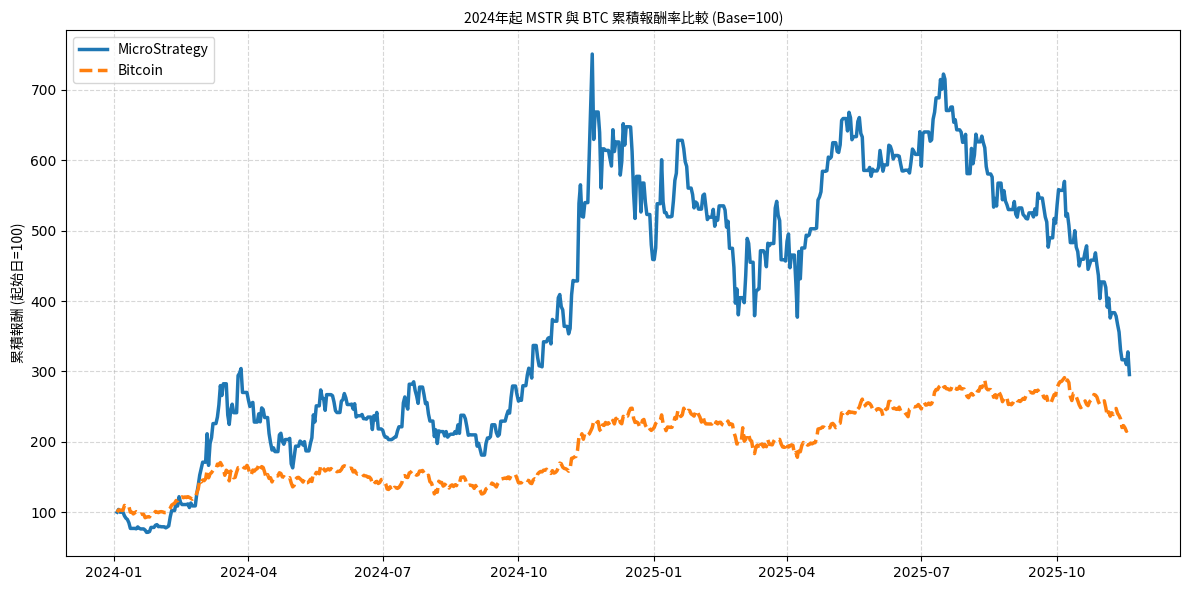

In [18]:
# 1. 先檢查一下資料狀況 (這步很重要，看看為什麼 MSTR 是空的)
print("--- 檢查 2024 年後的資料前 5 筆 ---")
print(df_2024.head())
print("\n--- 檢查是否有空值 ---")
print(df_2024.isnull().sum())

# 2. 如果發現空值，我們先補齊或刪除 (通常 fillna 是個好選擇)
df_2024_clean = df_2024.fillna(method='ffill').dropna()

# 3. 重新計算 Base=100 (確保第一筆資料都有值)
# 使用 iloc[0] 鎖定第一天的價格當分母
normalized_df = df_2024_clean / df_2024_clean.iloc[0] * 100

# 4. 重新繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 畫 MSTR (藍色實線)
plt.plot(normalized_df.index, normalized_df['MSTR'],
         label='MicroStrategy', color='tab:blue', linewidth=2.5)

# 畫 BTC (橘色虛線)
plt.plot(normalized_df.index, normalized_df['BTC'],
         label='Bitcoin', color='tab:orange', linewidth=2.5, linestyle='--')

plt.title('2024年起 MSTR 與 BTC 累積報酬率比較 (Base=100)', fontsize=16, fontproperties=myfont)
plt.ylabel('累積報酬 (起始日=100)', fontproperties=myfont)
plt.legend(prop=myfont, fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

正在下載資料...
資料準備完成，共 1480 筆交易日。


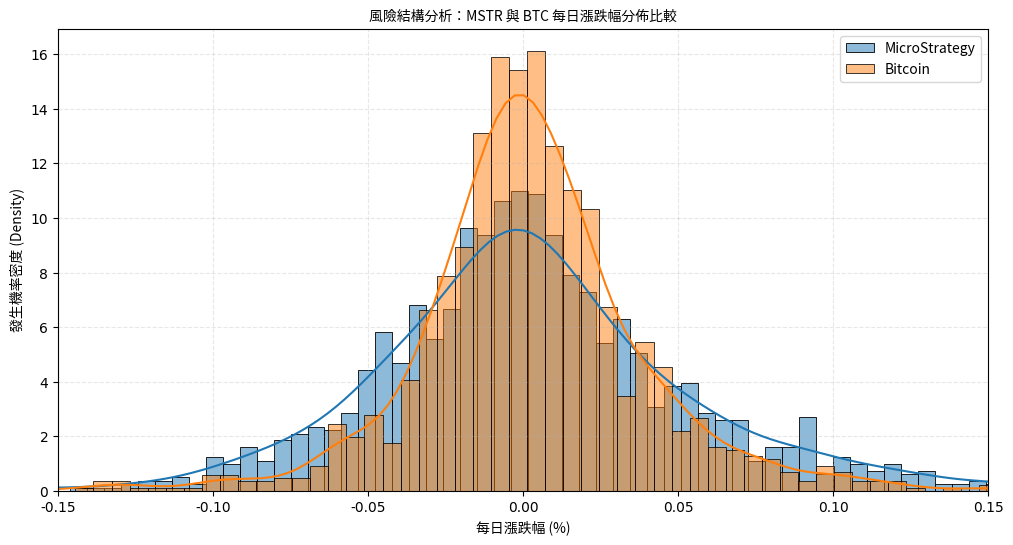

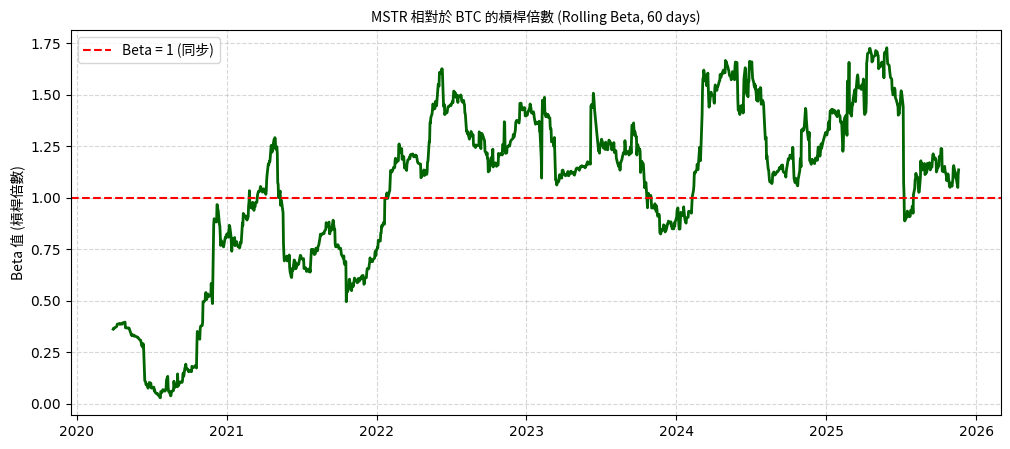

近期平均 Beta 值: 1.13


In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 1. 重新準備資料 (確保 df_analysis 存在)
# ---------------------------------------------------------
start = '2020-01-01'
end = '2025-11-20'

print("正在下載資料...")
BTC = yf.download('BTC-USD', start=start, end=end)['Close'].ffill().dropna()
Micro = yf.download('MSTR', start=start, end=end)['Close'].ffill().dropna()

# 合併兩者，使用 'inner' join 去除週末 (只保留共同交易日)
df_analysis = pd.concat([BTC, Micro], axis=1, join='inner')
df_analysis.columns = ['Bitcoin', 'MicroStrategy']

print(f"資料準備完成，共 {len(df_analysis)} 筆交易日。")

# ---------------------------------------------------------
# 2. 計算每日漲跌幅 & 畫圖
# ---------------------------------------------------------
daily_returns = df_analysis.pct_change().dropna()

# 設定中文字型 (確保你有執行過之前的字型設定，若無請忽略 fontproperties 參數)
# 如果字型報錯，把下面這行 fontproperties=myfont 拿掉即可
try:
    font_prop = myfont
except NameError:
    font_prop = None # 如果沒設定過字型，就用預設

# === 圖表 A: 波動率分佈直方圖 (Histogram) ===
plt.figure(figsize=(12, 6))
sns.histplot(daily_returns['MicroStrategy'], bins=100, color='tab:blue',
             label='MicroStrategy', kde=True, stat="density", alpha=0.5)
sns.histplot(daily_returns['Bitcoin'], bins=100, color='tab:orange',
             label='Bitcoin', kde=True, stat="density", alpha=0.5)

plt.title('風險結構分析：MSTR 與 BTC 每日漲跌幅分佈比較', fontsize=16, fontproperties=font_prop)
plt.xlabel('每日漲跌幅 (%)', fontproperties=font_prop)
plt.ylabel('發生機率密度 (Density)', fontproperties=font_prop)
plt.xlim(-0.15, 0.15)
plt.legend(prop=font_prop, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# === 圖表 B: 滾動 Beta 值 (Rolling Beta) ===
window = 60
rolling_cov = daily_returns['MicroStrategy'].rolling(window=window).cov(daily_returns['Bitcoin'])
rolling_var = daily_returns['Bitcoin'].rolling(window=window).var()
rolling_beta = rolling_cov / rolling_var

plt.figure(figsize=(12, 5))
plt.plot(rolling_beta.index, rolling_beta, color='darkgreen', linewidth=2)
plt.axhline(y=1, color='red', linestyle='--', label='Beta = 1 (同步)')
plt.title(f'MSTR 相對於 BTC 的槓桿倍數 (Rolling Beta, {window} days)', fontsize=16, fontproperties=font_prop)
plt.ylabel('Beta 值 (槓桿倍數)', fontproperties=font_prop)
plt.legend(prop=font_prop, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print(f"近期平均 Beta 值: {rolling_beta.iloc[-1]:.2f}")